Predicting Titanic Classification

Predictive model that analyzes data on passenger demographics, ticket information, and cabin location to predict which passengers were more likely to survive the shipwreck

# New section

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [62]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Collection & Preprocessing

In [63]:
# Data Preprocessing
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

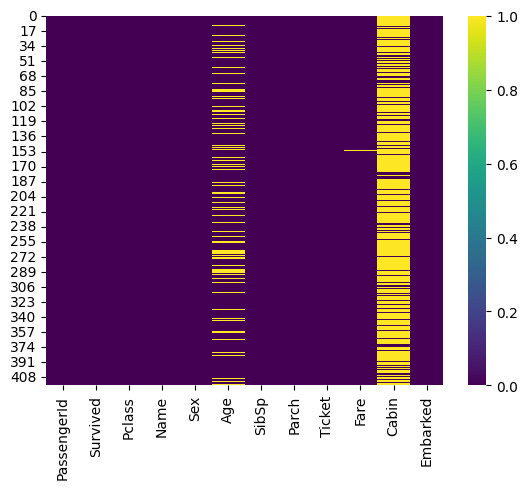

In [64]:
sns.heatmap(df_titanic.isnull(),cmap='viridis')

In [65]:
df_titanic.drop('Cabin',axis=1,inplace=True)

In [66]:
df_titanic.dropna(inplace=True)
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Transformation into a categorical column

In [67]:
df_titanic.replace({'Sex':{'male':0,'female':1}})
df_titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}})
df_titanic.dropna(inplace=True)
#pd.set_option('future.no_silent_downcasting', True)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


Data Split into target and features variables

In [68]:
X = df_titanic.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y = df_titanic['Survived']

Train Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [70]:
# Fit the Logistic Regression model
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X['Sex'] = le_sex.fit_transform(X['Sex'])
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])

X_train['Sex'] = le_sex.transform(X_train['Sex'])
X_train['Embarked'] = le_embarked.transform(X_train['Embarked'])

X_test['Sex'] = le_sex.transform(X_test['Sex'])
X_test['Embarked'] = le_embarked.transform(X_test['Embarked'])

# Fit the RandomForestClassifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))

1.0


In [71]:
y_pred_rf

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1])

Check for a Random

In [72]:
user_input = [[3, 0, 22, 1, 0, 7.25, 0]]
user_input_np = np.asarray(user_input)
prediction = rf.predict(user_input_np.reshape(1, -1))
if prediction == 0:
    print('The passenger did not survive')
else:
    print('The passenger survived')


The passenger survived


C:\Users\nazia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
